In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
import glob
import imf_sample as IMF
import pandas as pd
import scipy.stats as stats
from scipy.integrate import quad

from matplotlib import rc, rcParams
rcParams['font.family'] = "serif"
rc('text', usetex=True)
rcParams.update({'font.size': 16, 'figure.figsize': [10,10], 'legend.fontsize':10})
# sns.set_style('white')
# sns.set(rc={'font.size': 16, 'figure.figsize': [10,8], 'legend.fontsize':10, 'text.usetex': True})

In [2]:
with fits.open('L50M_mass_age_all.fits') as hdul:
    L50_all = hdul[1].data
with fits.open('L70M_mass_age_all.fits') as hdul:
    L70_all = hdul[1].data
with fits.open('L100M_mass_age_all.fits') as hdul:
    L100_all = hdul[1].data
with fits.open('Lv_mass_age_all.fits') as hdul:
    Lv_all = hdul[1].data
with fits.open('L50M_mass_age_cluster1.fits') as hdul:
    L50_cluster1 = hdul[1].data
with fits.open('L50M_mass_age_cluster2.fits') as hdul:
    L50_cluster2 = hdul[1].data
with fits.open('L50M_mass_age_cluster3.fits') as hdul:
    L50_cluster3 = hdul[1].data
with fits.open('L50M_mass_age_cluster4.fits') as hdul:
    L50_cluster4 = hdul[1].data
with fits.open('L50M_mass_age_cluster5.fits') as hdul:
    L50_cluster5 = hdul[1].data
with fits.open('L100M_mass_age_cluster1.fits') as hdul:
    L100_cluster1 = hdul[1].data
with fits.open('L100M_mass_age_cluster2.fits') as hdul:
    L100_cluster2 = hdul[1].data
with fits.open('L100M_mass_age_cluster3.fits') as hdul:
    L100_cluster3 = hdul[1].data
with fits.open('L100M_mass_age_cluster4.fits') as hdul:
    L100_cluster4 = hdul[1].data
with fits.open('L100M_mass_age_cluster5.fits') as hdul:
    L100_cluster5 = hdul[1].data
with fits.open('L70M_mass_age_cluster1.fits') as hdul:
    L70_cluster1 = hdul[1].data
with fits.open('L70M_mass_age_cluster2.fits') as hdul:
    L70_cluster2 = hdul[1].data
with fits.open('L70M_mass_age_cluster3.fits') as hdul:
    L70_cluster3 = hdul[1].data
with fits.open('L70M_mass_age_cluster4.fits') as hdul:
    L70_cluster4 = hdul[1].data
with fits.open('L70M_mass_age_cluster5.fits') as hdul:
    L70_cluster5 = hdul[1].data

In [64]:
L50 = Table([L50_all['mass'], L50_all['age']], names=('mass', 'age')).to_pandas()
L70 = Table([L70_all['mass'], L70_all['age']], names=('mass', 'age')).to_pandas()
L100 = Table([L100_all['mass'], L100_all['age']], names=('mass', 'age')).to_pandas()
Lv = Table([Lv_all['mass'], Lv_all['age']], names=('mass', 'age')).to_pandas()

all_masses, all_ages, from_simulation, cluster_num, cluster_masses = [], [], [], [] ,[]


# for sim, name in zip([L50_cluster1, L50_cluster2, L50_cluster3, L50_cluster4, L50_cluster5, L70_cluster1, L70_cluster2, L70_cluster3, L70_cluster4, L70_cluster5, L100_cluster1, L100_cluster2, L100_cluster3, L100_cluster4, L100_cluster5, Lv_all], \
#                      ['L50_cluster1', 'L50_cluster2', 'L50_cluster3', 'L50_cluster4', 'L50_cluster5', 'L70_cluster1', 'L70_cluster2', 'L70_cluster3', 'L70_cluster4', 'L70_cluster5', 'L100_cluster1', 'L100_cluster2', 'L100_cluster3', 'L100_cluster4', 'L100_cluster5', 'Lv_all']):
    
    
# just do the most massive 3 clusters
    
for sim, name in zip([L50_cluster1, L50_cluster2, L50_cluster3, L70_cluster1, L70_cluster2, L70_cluster3, L100_cluster1, L100_cluster2, L100_cluster3, Lv_all], 
                     ['L50_cluster1', 'L50_cluster2', 'L50_cluster3', 'L70_cluster1', 'L70_cluster2', 'L70_cluster3', 'L100_cluster1', 'L100_cluster2', 'L100_cluster3', 'Lv_all']):
    all_masses += list(sim['mass'])
    #all_ages += list(sim['age'])
#     kroupa = Kroupa(sim['mass'], len(sim['mass'])+1)
#     all_masses += list(kroupa.x)
    
    for n in ["L50", "L70", "L100", "Lv"]:
        if n in name: 
            from_simulation += [n]*len(sim)
    #from_simulation += ['Kroupa']*len(sim)
    if "Lv" not in name:
        cluster = name.split("_")[1]
        #cluster = name.replace("_", " ")
        cluster_num += [cluster]*len(sim)
    else: 
        cluster_num += ['cluster1']*len(sim)

        
    cluster_masses.append(sum(sim['mass']))
    
#print(all_masses, all_ages, from_simulation, cluster_num)
df = pd.DataFrame([x for x in zip(all_masses, from_simulation, cluster_num)], columns=['Mass', 'Simulation', 'Cluster']) 
# kroupa_all = Kroupa(df['Mass', len(df)+1)
# new_masses = all_masses + list(kroupa_all.x)
# all_sims = from_simulation + ['Kroupa']*len(kroupa_all.x)
# df2 = pd.DataFrame([x for x in zip(new_masses,all_sims)], columns=['Mass','Simulation'])


L100 ['cluster1' 'cluster2' 'cluster3']
L50 ['cluster1' 'cluster2' 'cluster3']
L70 ['cluster1' 'cluster2' 'cluster3']
Lv ['cluster1']


In [147]:
# Define two parts of IMF
def low_imf(x):
    return x ** (-1.3)
def high_imf(x):
    return 0.5 * x ** (-2.3)
def low_int(x):
    return x ** (-0.3)
def high_int(x):
    return 0.5 * x ** (-1.3)
def normalize_kroupa(input_masses, bins=11):
    masses_all = input_masses
    masses_imf = input_masses
    
    # Normalization for Kroupa IMF and total mass
    norm_kroupa = quad(low_int, 0.08, 0.5)[0] + quad(high_int, 0.5, 150)[0]
    print(norm_kroupa)
    total_mass = np.sum(masses_all)
    C = total_mass / norm_kroupa
    print(C)

    # IMF for star froms IMF
    # Value of KS test highly dependent on number of bins
    bins_imf   = np.logspace(np.log10(0.08), np.log10(150), bins)
    counts_imf = np.histogram(masses_imf, bins_imf)[0]
    x_imf      = []
    imf_imf    = []
    for i in range(len(bins_imf) - 1):
        x_imf.append(10 ** ((np.log10(bins_imf[i]) + np.log10(bins_imf[i+1])) / 2))
        imf_imf.append(C * np.min([quad(low_imf, bins_imf[i], bins_imf[i+1])[0], \
            quad(high_imf, bins_imf[i], bins_imf[i+1])[0]]))
    print("sum of x_imf", sum(x_imf), "sum of imf_imf", sum(imf_imf))
    return x_imf, imf_imf, bins_imf, counts_imf


def get_kroupa_df(dataframe):
    """ get kroupa distribution for each cluster in a simulation's dataframe
    using same number of stars (i.e. bins argument for normalize_kroupa) """
    
    kroupa_masses, kroupa_clusters = [], []  
    corresponding_cluster = []

    for idx, cluster in enumerate(np.unique(dataframe['Cluster'])):
        c = dataframe[dataframe['Cluster'] == cluster]
        kroupa_labels = ["Kroupa " + x for x in np.unique(dataframe['Cluster'])]
        num_stars = len(c)

        x_imf, imf_imf, bins_imf, counts_imf = normalize_kroupa(c['Mass'], bins=11)
        x_imf = np.log10(x_imf)
        
        kroupa_masses += list(x_imf)
        kroupa_clusters += ['Kroupa cluster %d' % (idx+1)]*len(x_imf)
        corresponding_cluster += [cluster]*len(x_imf)
        
    df = pd.DataFrame(data=[x for x in zip(kroupa_masses, kroupa_clusters, corresponding_cluster)], columns=['Mass', 'Cluster', 'Corresponding'])

    return df

from scipy.stats import rv_continuous
class Kroupa(stats.rv_continuous):
    def __init__(self, imf_masses, size):
        self.x, self.imf, self.bins, self.counts = normalize_kroupa(imf_masses, bins=11)
        self.x = np.log10(self.x)
        self.bins = np.log10(self.bins)
        self.kde = stats.gaussian_kde(self.x)
        #print("kde type", type(self.kde[0]))
        self.name = 'kroupa'
        
    def imf(self):
        return self.x
    
    def rvs(self, loc=0, scale=1, size=1):
        rand_idx = np.random.randint(0, len(self.x), size=size)
        sample = self.x_imf[rand_idx]
        sample += np.array(loc)*size
        sample *= np.array(scale)*size
        
        #want to generate sample with mean of loc and stddev=scale
        
        return self.x_imf[rand_idx]
        
    def pdf(self, x, size=1000, bw_adjust=None):
        #prob density estimate using a gaussian kernel
        x = np.linspace(min(self.x), max(self.x), size)
        return self.kde.evaluate(x)
    
    def cdf(self, x):
        self.cdf = np.vectorize(lambda x: self.kde.integrate_box_1d(-np.inf, x))
        return self.cdf(x)
    
#         stdev = np.sqrt(self.pde.covariance)[0,0]
#         return ndtr(np.subtract.outer(x,n)/stdev).mean(axis=1)
    
    def ppf(self, x):
        return 1/self.cdf(x)
    
    def pmf(self, x):
#         val, counts = np.unique(self.kroupa_masses, return_counts=True)
#         self.pmf = counts/len(self.kroupa_masses)
        df = pd.DataFrame(x)
        self.pmf = df.value_counts(normalize=True)
        #self.pmf.index and self.pmf.values
        return self.pmf
    
    def median(self, loc=0, scale=1):
        median = scale*np.median(self.x)+loc
        return np.around(median, decimals=3)
    
    def mean(self, loc=0, scale=1):
        mean = scale*np.mean(self.x)+loc
        return np.around(mean, decimals=3)
    
    def var(self, loc=0, scale=1):
        var = scale*np.var(self.x)+loc
        return np.around(var, decimals=3)
    
    def std(self, loc=0, scale=1):
        std = scale*np.std(self.x)+loc
        return np.around(std, decimals=3)
    
#     def _skew(loc=0, scale=1):
#         # for unimodal continuous distributions, skew > 0 means more weight in right tail
        
#         # skew = 3*(mean-median)/std_dev
        
#         return scale*stats.skew(self.x_imf, nan_policy='propogate')+loc
    
#     def _kurtosis(loc=0, scale=1):
#         # distribution with a higher kurtosis has a heavier tail
#         # kurtosis of normal distribution is zero
        
#     def _expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds):
#         # expectation of function against the pdf or pmf
    
    def stats(self, loc=0, scale=1, moments='mv'):
        mean = self.mean()
        var = self.var()
#         skew = self.skew()
#         kurtosis = self.kurtosis()
        
        if moments == 'm': return mean
        elif moments == 'v': return var
        elif moments == 's': return skew
        elif moments == 'k': return kurtosis
        elif moments == 'mv': return mean, var
        elif moments == 'mvs': return mean, var, skew
        elif moments == 'mvsk': return mean, var, skew, kurtosis
        elif moments == 'vs' or 'sv': return var, skew
        elif moments == 'vsk' or 'vks' or 'svk' or 'skv' or 'ksv' or 'kvs': return var, skew, kurtosis
        elif moments == 'sk': return skew, kurtosis 




In [148]:
all_masses = []
cluster_num = []
from_simulation=[]
for sim, name in zip([L50_cluster1, L50_cluster2, L50_cluster3, L70_cluster1, L70_cluster2, L70_cluster3, L100_cluster1, L100_cluster2, L100_cluster3, Lv_all], 
                     ['L50_cluster1', 'L50_cluster2', 'L50_cluster3', 'L70_cluster1', 'L70_cluster2', 'L70_cluster3', 'L100_cluster1', 'L100_cluster2', 'L100_cluster3', 'Lv_cluster1']):
    
    mass = [10**x for x in sim['Mass']]
    print("for", name, "sum of mass is", sum(mass))
    masses, imf, bins, counts = normalize_kroupa(mass)
    print("sum of kroupa mass=", sum(masses))
    all_masses += [np.log10(x) for x in masses]
    for n in ["L50", "L70", "L100", "Lv"]:
        if n in name: 
            from_simulation += [n]*len(masses)
            cluster = '%s %s' % (name.split("_")[0], name.split("_")[1])
            cluster_num += [cluster]*len(masses)
kroupa_df = pd.DataFrame([x for x in zip(all_masses, cluster_num, from_simulation)], columns=['Mass', 'Cluster', 'Simulation'])
print(np.unique(kroupa_df['Cluster']))

for L50_cluster1 sum of mass is 547.7377062223144
2.3167797153656364
236.42200533332522
sum of x_imf 194.29794246020384 sum of imf_imf 953.2064465009762
sum of kroupa mass= 194.29794246020384
for L50_cluster2 sum of mass is 274.04857946438307
2.3167797153656364
118.28857860192915
sum of x_imf 194.29794246020384 sum of imf_imf 476.9159939736919
sum of kroupa mass= 194.29794246020384
for L50_cluster3 sum of mass is 267.42321980952744
2.3167797153656364
115.42885067401522
sum of x_imf 194.29794246020384 sum of imf_imf 465.3861404294618
sum of kroupa mass= 194.29794246020384
for L70_cluster1 sum of mass is 332.21525982710796
2.3167797153656364
143.395273026498
sum of x_imf 194.29794246020384 sum of imf_imf 578.1411863667952
sum of kroupa mass= 194.29794246020384
for L70_cluster2 sum of mass is 238.8413324054514
2.3167797153656364
103.09194733594131
sum of x_imf 194.29794246020384 sum of imf_imf 415.64620283299354
sum of kroupa mass= 194.29794246020384
for L70_cluster3 sum of mass is 185.00

In [8]:
p = sns.displot(df, x='Mass', kind='kde', bw_adjust=-.8, hue='Simulation', legend=False, facet_kws={'despine': False}, height=8, aspect=10/8) #subplot_kws={'figsize': (10,8)}})
p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Probability Density')
plt.legend(labels=['L50', 'L70', 'L100', 'Lv'], fontsize='medium', frameon=False)
plt.tight_layout()
plt.title('Probability Density for all stars in simulation')
plt.savefig('prob_density_whole_sim.png')

In [9]:
p = sns.displot(df, x='Mass', kind='ecdf', hue='Simulation', legend=False, facet_kws={'despine': False}, height=8, aspect=10/8) #subplot_kws={'figsize': (10,8)}})
p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Cumulative Distribution')
plt.legend(labels=['L50', 'L70', 'L100', 'Lv'], fontsize='medium', frameon=False)
plt.tight_layout()
plt.title('Cumulative Distribution for each simulation')
plt.savefig('cumulative_dist_whole_sim.png')

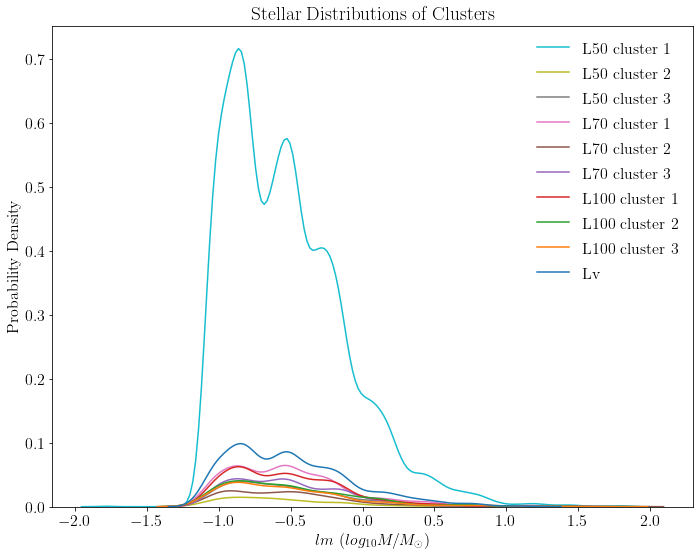

In [10]:
p = sns.displot(df, x='Mass', kind='kde', bw_adjust=-.8, hue='Cluster', legend=False, facet_kws={'despine': False}, height=8, aspect=10/8) #subplot_kws={'figsize': (10,8)}}) 
p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Probability Density', title='Stellar Distributions of Clusters')
plt.legend(labels=['L50 cluster 1', 'L50 cluster 2', 'L50 cluster 3', 'L70 cluster 1', 'L70 cluster 2', 'L70 cluster 3', 'L100 cluster 1', 'L100 cluster 2', 'L100 cluster 3', 'Lv'], fontsize='medium', frameon=False)
plt.tight_layout()
plt.savefig('prob_density_per_cluster.png')

In [123]:
p = sns.displot(kroupa_df, x='Mass', kind='kde', bw_adjust=-.8, hue='Cluster', legend=False, facet_kws={'despine': False}, height=8, aspect=10/8) #subplot_kws={'figsize': (10,8)}})
p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Probability Density')
plt.legend(labels=['Kroupa '+x for x in ['L50 cluster 1', 'L50 cluster 2', 'L50 cluster 3', 'L70 cluster 1', 'L70 cluster 2', 'L70 cluster 3', 'L100 cluster 1', 'L100 cluster 2', 'L100 cluster 3', 'Lv']], fontsize='medium', frameon=False)
plt.tight_layout()
plt.title('NOT WORKING: THIS IS WRONG')
plt.savefig('Kroupa_prob_density_per_cluster.png')

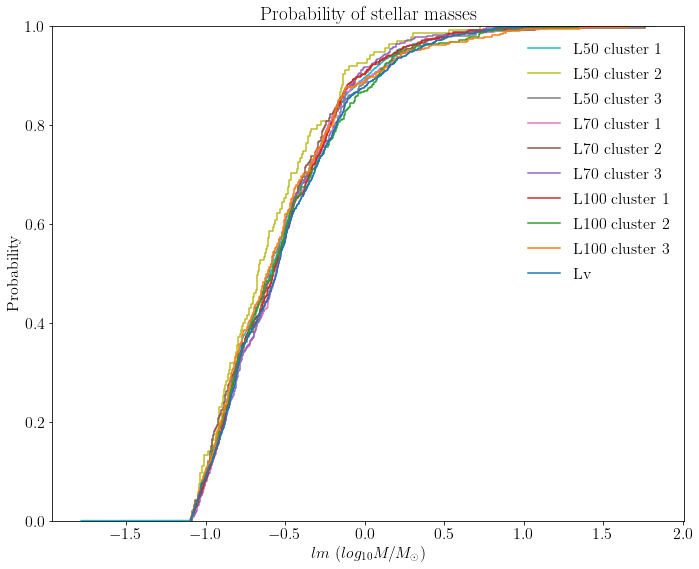

In [38]:
p = sns.displot(df, x='Mass', kind='ecdf', hue='Cluster', legend=False, facet_kws={'despine': False}, height=8, aspect=10/8) #subplot_kws={'figsize': (10,8)}})
p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Probability')
plt.legend(labels=['L50 cluster 1', 'L50 cluster 2', 'L50 cluster 3', 'L70 cluster 1', 'L70 cluster 2', 'L70 cluster 3', 'L100 cluster 1', 'L100 cluster 2', 'L100 cluster 3', 'Lv'], fontsize='medium', frameon=False)
plt.tight_layout()
plt.title('Probability of stellar masses')
plt.savefig('probability_per_cluster.png')

In [131]:
p = sns.displot(kroupa_df, x='Mass', kind='ecdf', hue='Cluster', legend=False, facet_kws={'despine': False}, height=8, aspect=10/8) #subplot_kws={'figsize': (10,8)}})
p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Probability')
plt.legend(labels=['Kroupa '+x for x in ['L50 cluster 1', 'L50 cluster 2', 'L50 cluster 3', 'L70 cluster 1', 'L70 cluster 2', 'L70 cluster 3', 'L100 cluster 1', 'L100 cluster 2', 'L100 cluster 3', 'Lv']], fontsize='medium', frameon=False)
plt.tight_layout()
plt.title('Kroupa probabilities of stellar masses')
plt.savefig('Kroupa_probability_per_cluster.png')

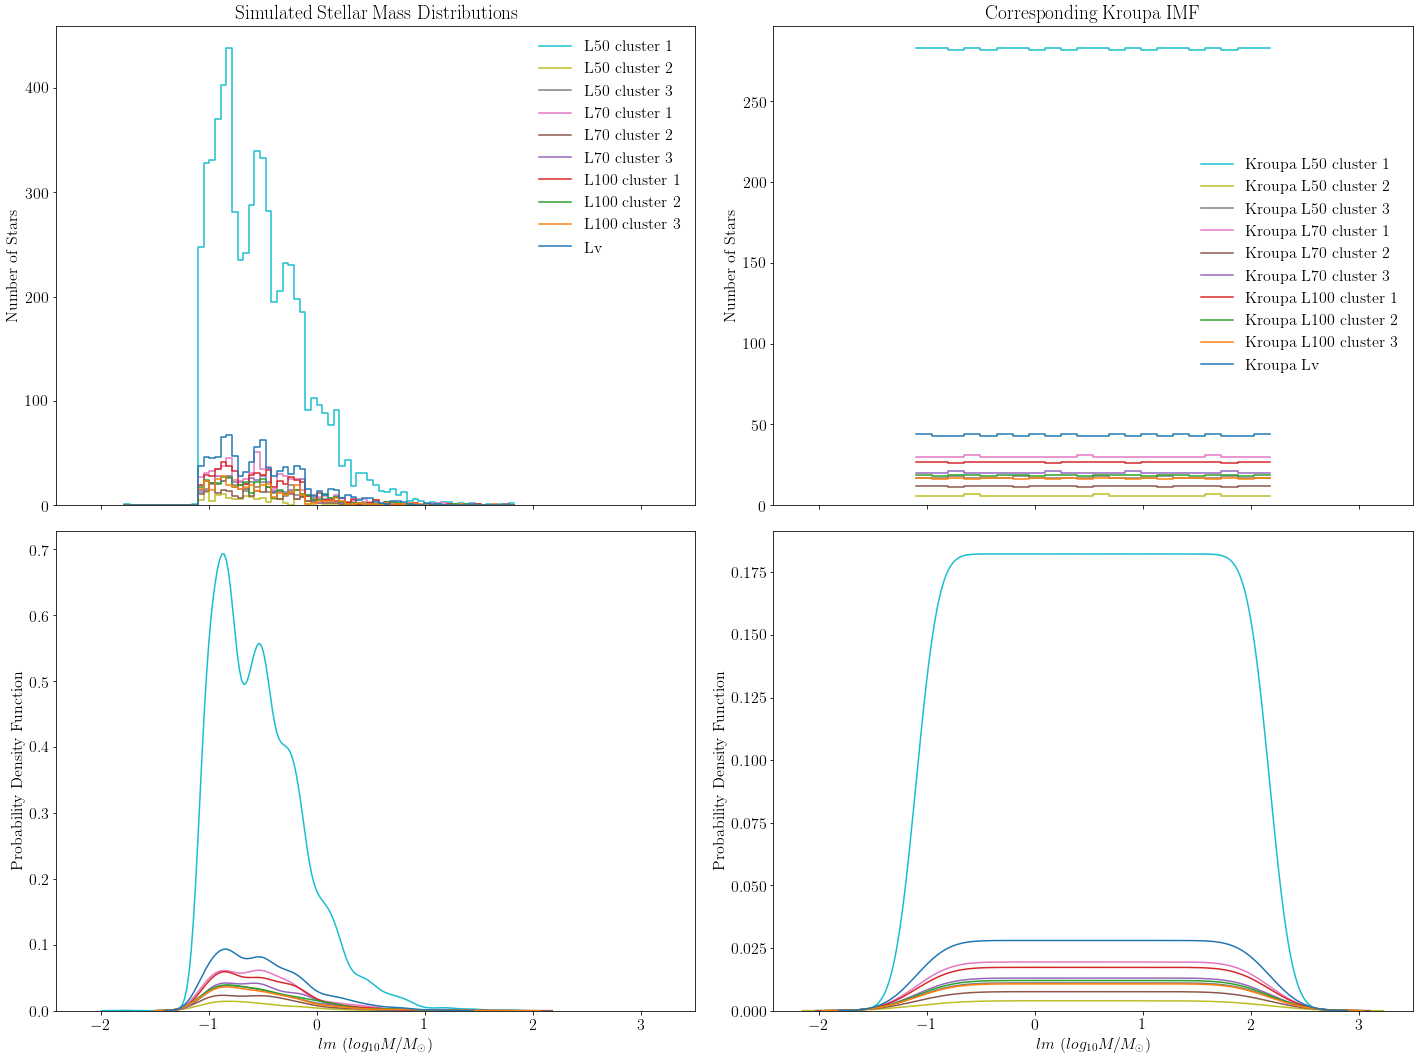

In [35]:
palette = sns.color_palette('icefire', 10)
fig, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(20,15), sharex=True)
ax2[0, 0].set_title('Simulated Stellar Mass Distributions')
ax2[0, 0].set_ylabel('Number of Stars')
ax2[1, 0].set_ylabel('Probability Density Function')
ax2[1, 0].set_xlabel(r'$lm$ ($log_{10} M/M_{\odot}$)')

ax2[0, 1].set_title('Corresponding Kroupa IMF')
ax2[0, 1].set_ylabel('Number of Stars')
ax2[1, 1].set_ylabel('Probability Density Function')
ax2[1, 1].set_xlabel(r'$lm$ ($log_{10} M/M_{\odot}$)')
plt.subplots_adjust(hspace=0.0)

sns.kdeplot(data=df, x='Mass', hue='Cluster', ax=ax2[1, 0], fill=False, common_norm=True, legend=False)
sns.kdeplot(data=kroupa_df, x='Mass', hue='Cluster', ax=ax2[1, 1], fill=False, common_norm=True, legend=False)

sns.histplot(data=df, ax=ax2[0, 0], x='Mass', stat='count', hue='Cluster', fill=False, common_bins=True, element='step', legend=False)
sns.histplot(data=kroupa_df, ax=ax2[0, 1], x='Mass', stat='count', hue='Cluster', fill=False, common_bins=True, element='step', legend=False)

ax2[0,0].legend(labels=['L50 cluster 1', 'L50 cluster 2', 'L50 cluster 3', 'L70 cluster 1', 'L70 cluster 2', 'L70 cluster 3', 'L100 cluster 1', 'L100 cluster 2', 'L100 cluster 3', 'Lv'], fontsize='medium', frameon=False)
ax2[0,1].legend(labels=['Kroupa '+x for x in ['L50 cluster 1', 'L50 cluster 2', 'L50 cluster 3', 'L70 cluster 1', 'L70 cluster 2', 'L70 cluster 3', 'L100 cluster 1', 'L100 cluster 2', 'L100 cluster 3', 'Lv']], fontsize='medium', frameon=False)

plt.tight_layout()
plt.savefig('number_stars_prob_dens_per_cluster.png')

60   -0.933260
61   -0.605960
62   -0.278660
63    0.048640
64    0.375941
65    0.703241
66    1.030541
67    1.357841
68    1.685141
69    2.012441
Name: Mass, dtype: float64
70   -0.933260
71   -0.605960
72   -0.278660
73    0.048640
74    0.375941
75    0.703241
76    1.030541
77    1.357841
78    1.685141
79    2.012441
Name: Mass, dtype: float64
80   -0.933260
81   -0.605960
82   -0.278660
83    0.048640
84    0.375941
85    0.703241
86    1.030541
87    1.357841
88    1.685141
89    2.012441
Name: Mass, dtype: float64
0   -0.933260
1   -0.605960
2   -0.278660
3    0.048640
4    0.375941
5    0.703241
6    1.030541
7    1.357841
8    1.685141
9    2.012441
Name: Mass, dtype: float64
10   -0.933260
11   -0.605960
12   -0.278660
13    0.048640
14    0.375941
15    0.703241
16    1.030541
17    1.357841
18    1.685141
19    2.012441
Name: Mass, dtype: float64
20   -0.933260
21   -0.605960
22   -0.278660
23    0.048640
24    0.375941
25    0.703241
26    1.030541
27    1.357841
28   

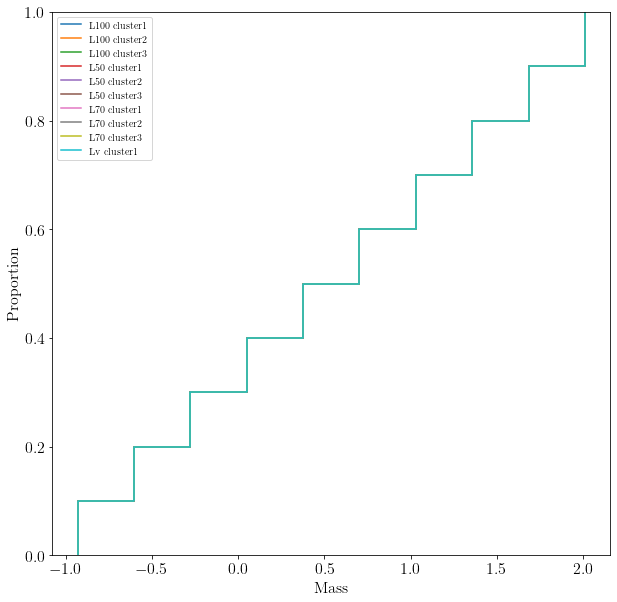

In [139]:
#check normalize_kroupa()

# x_imf, imf_imf, bins_imf, counts_imf = normalize_kroupa(L50_cluster1['Mass'], bins=11)

# print("number of stars in L50 cluster 1:", len(L50_cluster1['Mass']))
# print("number of stars in normalize_kroupa output:", sum(counts_imf))
# #plt.hist(np.log10(x_imf), histtype='step')
# plt.plot(np.log10(bins_imf[:-1]), counts_imf)
# #sns.histplot(data=np.log10(x_imf), stat='count', color='r')
# plt.show()

#sns.ecdfplot(data=kroupa_df, x='Mass', hue='Cluster')
fig, ax = plt.subplots()
for x in np.unique(kroupa_df['Cluster']):
    d = kroupa_df[kroupa_df['Cluster'] == x]
    sns.ecdfplot(data=d, x='Mass', ax=ax, label=x)
    print(d['Mass'])
plt.legend()
plt.show()

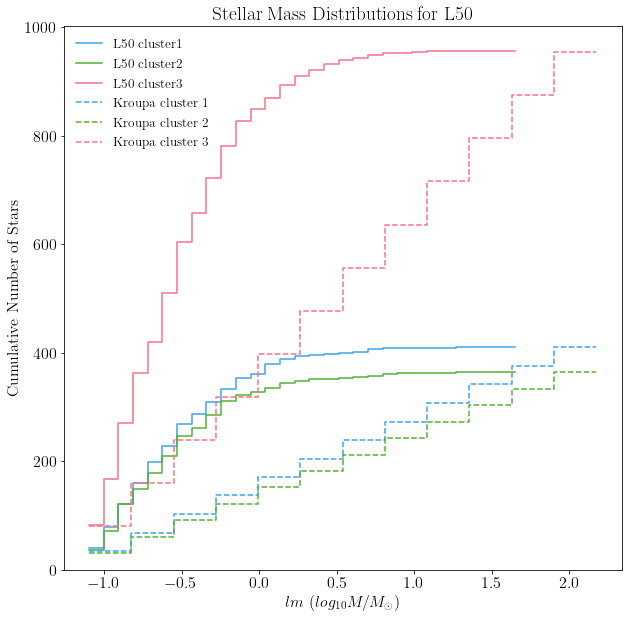

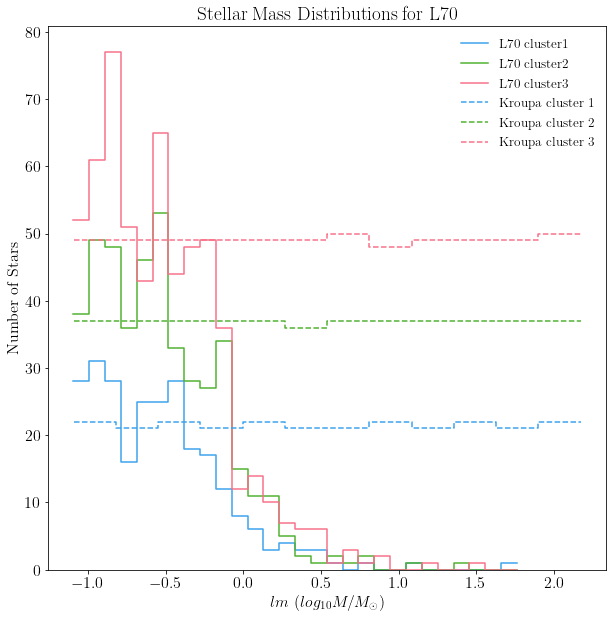

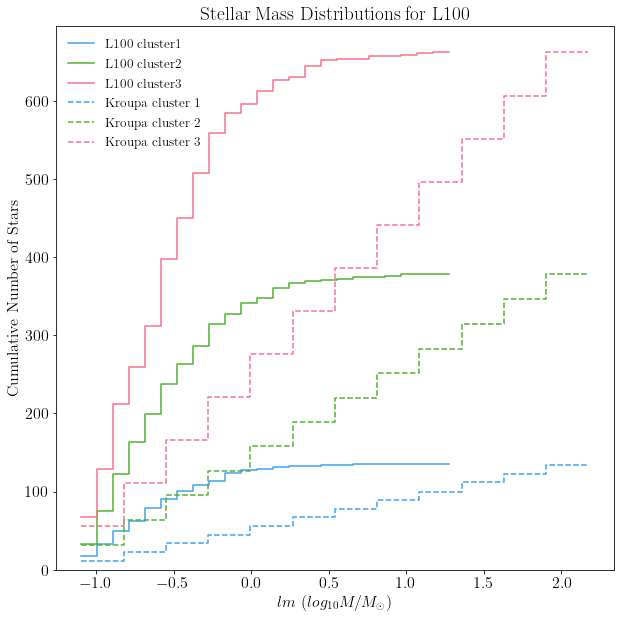

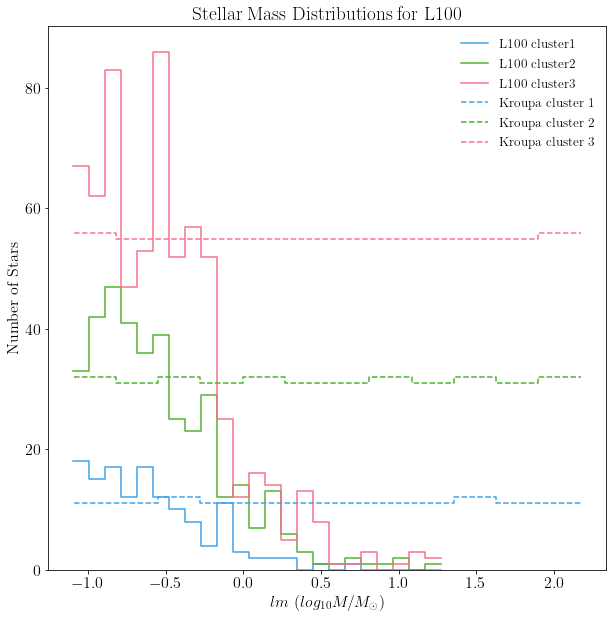

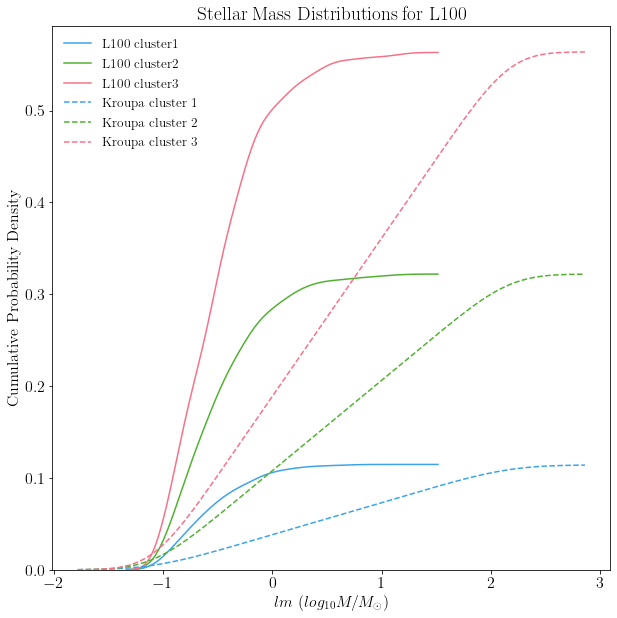

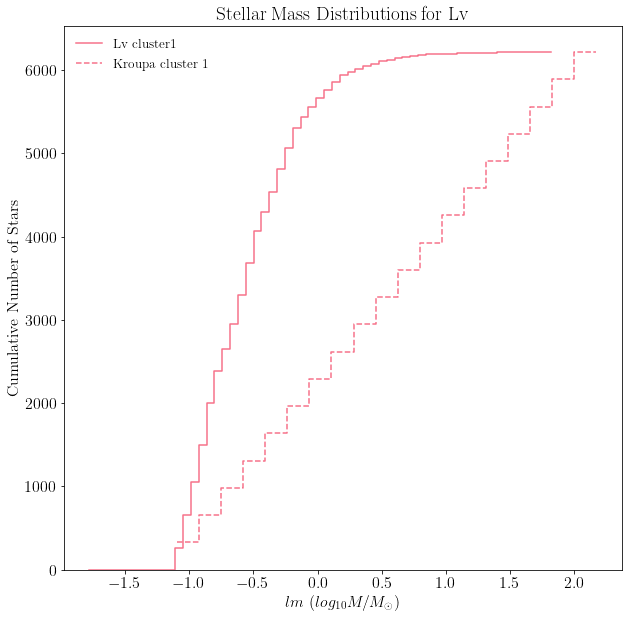

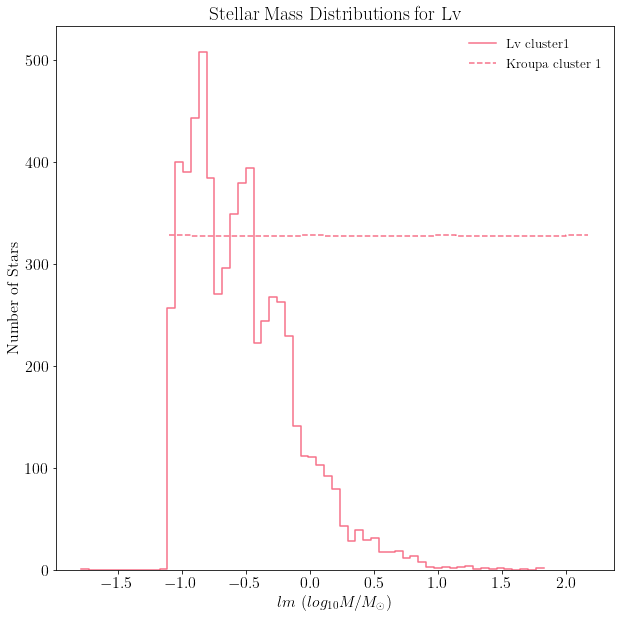

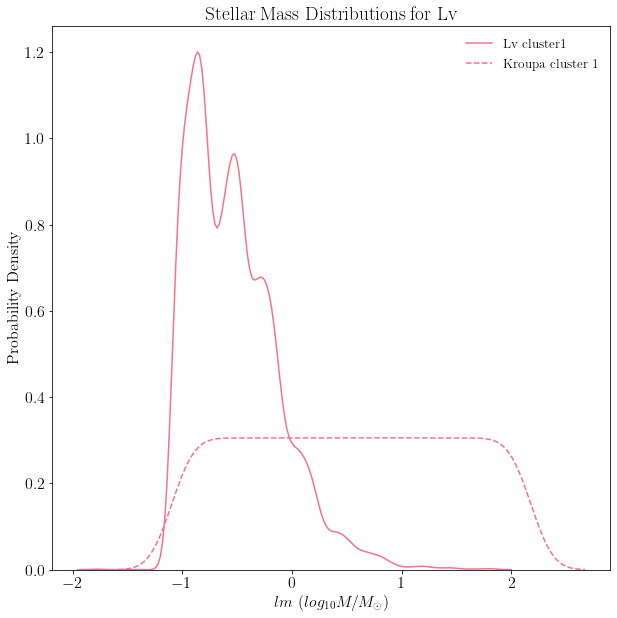

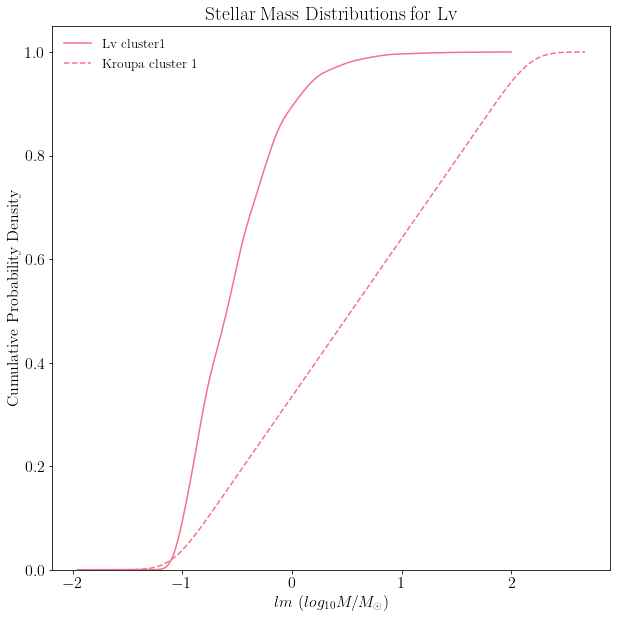

In [52]:
stats = ['count', 'density'] #  'probability', 'frequency', 'percent',
ylabels = ['Number of Stars', 'Density (normalized)'] # 'Probability', 'Frequency (normalized)', 'Percent (normalized)',
palette_name = 'husl' #'rocket'  #icefire 

for name in ['L50', 'L70', 'L100', 'Lv']:
    d = df[df['Simulation'] == name]
    kroupa = get_kroupa_df(d)        
    palette = sns.color_palette(palette_name, len(np.unique(kroupa['Cluster'])))

    labels = list(np.unique(d['Cluster']))
    labels += list(np.unique(kroupa['Cluster']))

    # make count plot for cumulative == False and cumulative == True
    fig, ax = plt.subplots(figsize=(10,10)) 
    ax.set_title('Stellar Mass Distributions for %s' %name)
    p = sns.histplot(data=d, ax=ax, x='Mass', stat='count', cumulative=True, legend=False, hue='Cluster', fill=False, common_bins=True, element='step', palette=palette)
    p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Cumulative Number of Stars')
    sns.histplot(data=kroupa, x='Mass', ax=ax, stat='count', cumulative=True, hue='Cluster', legend=False, fill=False, common_bins=True, element='step', linestyle='--', palette=palette)
    ax.legend(labels=labels, fontsize='small', frameon=False)
    fig.savefig('%s_%s.png' % (name, 'num'))          
          
    fig2, ax2 = plt.subplots(figsize=(10,10)) 
    ax2.set_title('Stellar Mass Distributions for %s' %name)
    p = sns.histplot(data=d, ax=ax2, x='Mass', stat='count', cumulative=False, legend=False, hue='Cluster', fill=False, common_bins=True, element='step', palette=palette)
    p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Number of Stars')
    sns.histplot(data=kroupa, x='Mass', ax=ax2, stat='count', cumulative=False, hue='Cluster', legend=False, fill=False, element='step', linestyle='--', palette=palette)
    ax2.legend(labels=labels, fontsize='small', frameon=False)
    fig2.savefig('%s_%s.png' % (name, 'cumulative_num'))
          
    # make density distribution
    fig3, ax3 = plt.subplots(figsize=(10,10)) 
    ax3.set_title('Stellar Mass Distributions for %s' %name)
    p = sns.kdeplot(data=d, x='Mass', hue='Cluster', ax=ax3, bw_adjust=-.8, common_norm=True, common_grid=True, legend=False, fill=False, palette=palette)    
    p = sns.kdeplot(data=kroupa, x='Mass', hue='Cluster', ax=ax3, common_norm=True, common_grid=True, legend=False, fill=False, linestyle='--', palette=palette)
    p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Probability Density')
    ax3.legend(labels=labels, fontsize='small', frameon=False)
    fig.savefig('%s_%s.png' % (name, 'kde'))
    
    # make cumulative density distribution
    fig3, ax3 = plt.subplots(figsize=(10,10)) 
    ax3.set_title('Stellar Mass Distributions for %s' %name)
    p = sns.kdeplot(data=d, x='Mass', hue='Cluster', ax=ax3, bw_adjust=.8, common_norm=True, common_grid=True, cumulative=True, legend=False, fill=False, palette=palette)    
    p = sns.kdeplot(data=kroupa, x='Mass', hue='Cluster', ax=ax3, common_norm=True, common_grid=True, cumulative=True, legend=False, fill=False, linestyle='--', palette=palette)
    p.set(xlabel=r'$lm$ ($log_{10} M/M_{\odot}$)', ylabel='Cumulative Probability Density')
    ax3.legend(labels=labels, fontsize='small', frameon=False)
    fig.savefig('%s_%s.png' % (name, 'cumulative_kde'))
        
    plt.show()


In [82]:

def pp_plot(x, dist_cdf, line=True, ax=None, label=None):
    '''
    Function for comparing empirical data to a theoretical distribution by using a P-P plot.
    
    Params:
    x - empirical data
    dist - distribution object from scipy.stats; for example scipy.stats.norm(0, 1)
    line - boolean; specify if the reference line (y=x) should be drawn on the plot
    ax - specified ax for subplots, None is standalone
    '''
    if ax is None:
        ax = plt.figure().add_subplot(1, 1, 1)
        
    n = len(x)
    p = np.arange(1, n + 1) / n - 0.5 / n
    pp = np.sort(dist_cdf)
    
    if label != None:
            sns.scatterplot(x=p, y=pp, ax=ax, label=label)
            ax.legend(frameon=False, fontsize='small')
    else:
        sns.scatterplot(x=p, y=pp, ax=ax)
    ax.margins(x=0, y=0)
    
    if line: plt.plot(np.linspace(0, 1), np.linspace(0, 1), 'black', linestyle='dashed', lw=2)

    return ax


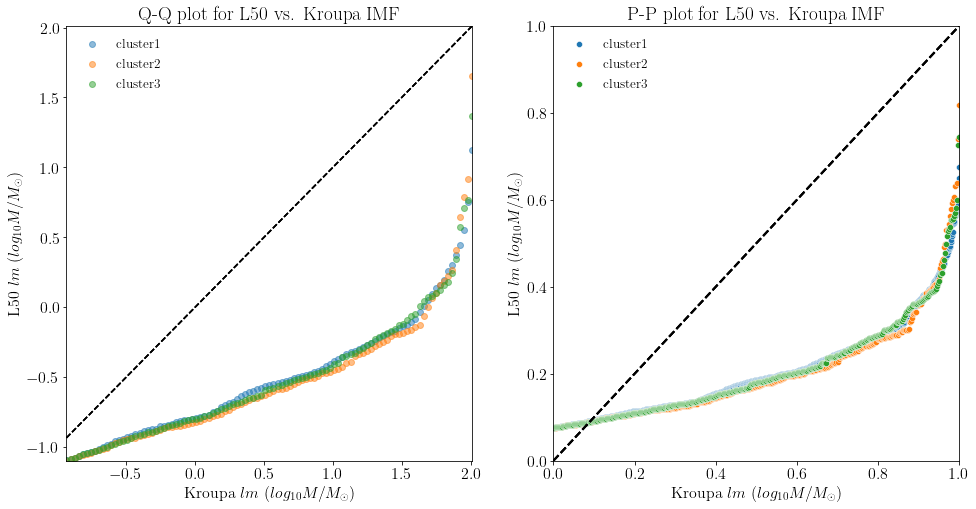

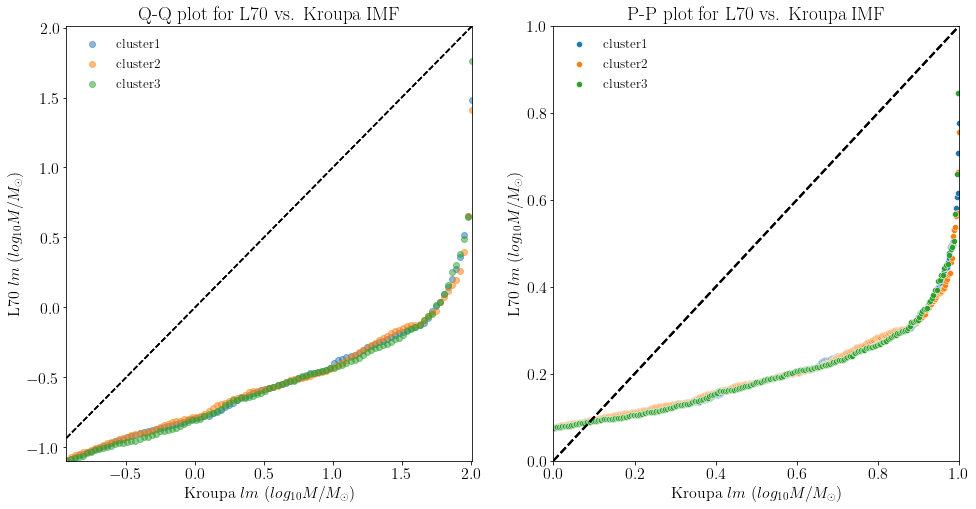

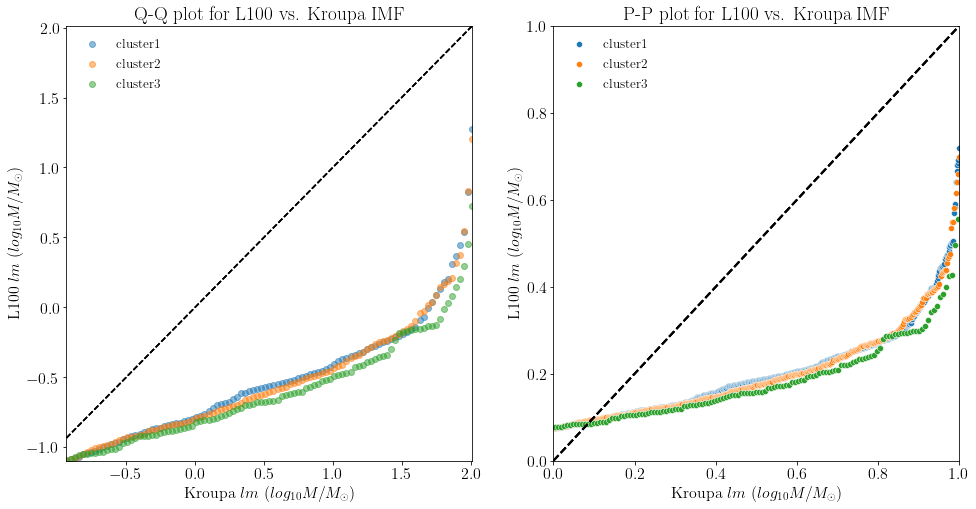

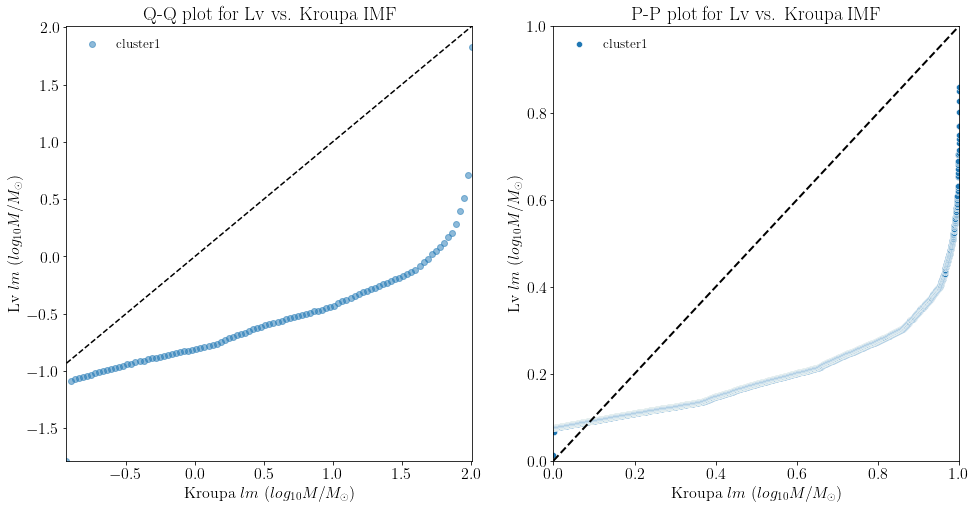

In [81]:
from statsmodels import api
import statsmodels.graphics.gofplots as g

for name in ['L50', 'L70', 'L100', 'Lv']:
    fig, ax = plt.subplots(figsize=(16,8), ncols=2)
    ax[0].set_title('Q-Q plot for %s vs. Kroupa IMF' % name)
    ax[1].set_title('P-P plot for %s vs. Kroupa IMF' % name)
    d = df[df['Simulation'] == name]
    kroupa = get_kroupa_df(d) 
    
    for cluster in np.unique(d['Cluster']):
        c = d[d['Cluster'] == cluster]
        k = kroupa[kroupa['Corresponding'] == cluster]  
        
        q = np.linspace(0, 100, 101)
        ax[0].scatter(np.percentile(k['Mass'], q), np.percentile(c['Mass'], q), label='%s' % cluster, alpha=0.5)
        #g.qqplot(c['Mass'], k['Mass'], ax=ax, fit=False, label="%s" % cluster.split(" ")[1])
        ax[0].plot(k['Mass'], k['Mass'], color='black', linestyle='--')
        
        
        masses = pd.to_numeric(c['Mass'])
        k = Kroupa(masses, size=len(masses))
        cdf = k.cdf(masses)
        pp_plot(masses, cdf, ax=ax[1], label='%s' % cluster)
        
    for axis in [ax[0], ax[1]]:
        axis.margins(x=0, y=0)
        axis.legend(frameon=False, fontsize='small')
    ax[0].set_xlabel(r'Kroupa $lm$ ($log_{10} M/M_{\odot}$)')
    ax[0].set_ylabel(r'%s $lm$ ($log_{10} M/M_{\odot}$)' % name)
    ax[1].set_xlabel(r'Kroupa $lm$ ($log_{10} M/M_{\odot}$)')
    ax[1].set_ylabel(r'%s $lm$ ($log_{10} M/M_{\odot}$)' % name)
    fig.savefig('%s_qq_pp.png' % name)
    

## QQ plot compares quantiles (idealized samples, e.g. groups of 5) where each data point
# in sample is paired w/ similar member from the idealized distribution at the same 
# cumulative distribution. perfect match will be along the diagonal line, deviations from
# diagonal show deviation from expected distribution

In [58]:

c1 = df[df['Cluster'] == 'L50 cluster1']
print(len(c1))
k = Kroupa(np.logspace(0.08, 150, 6000), len(c1)+1)
(unique, counts) = np.unique(c1['Mass'], return_counts=True)
#frequencies = np.asarray((unique, counts))
stats.chisquare(counts, f_exp=k.counts)

0


ValueError: shapes (0,) and (10,) could not be broadcast together

In [ ]:
# plt.plot(xk.reshape(-1), kroupa.pmf(xk.reshape(-1)))
# print(xk.reshape(-1))
# x = kroupa.rvs(size=100)
# print(x)
# print(kroupa.std(), kroupa.median())
# print(kroupa.expect(1))

# P-value is the probability that a given result (or more significant result) would occur if null hypothesis is true

# Reject the null hypothesis if and only if p-value is <= your significance level threshold (i.e. 0.05 or 0.01)

# if p > 0.05 then 2 samples are probably independent

# z value measures how many standard devs away is the mean from the observed value

# central limit theorem = what is shape of distribution of means when we draw repeated samples from a population?

In [85]:
## skewness = measure of asymmetry of distribution (whether tail of distribution extends
# to the right or left)
#stats.skew()

## pearson median skewness = relationship between mean and median (not sensitive to outliers)
#P = (3 * (stats.mean() - stats.median()))/stats.std()

## covariance of mass and luminosity of cluster ? covariance measures tendency of 2 variables to 
# vary together - maybe have X = cumulative mass distribution, Y = cumulative luminosity


In [18]:
#KS test 2 sample - non parametric comparing cumulative distributions, reports max diff
"""If the P value is small, conclude that the two groups were sampled from populations 
with different distributions. The populations may differ in median, variability or
the shape of the distribution.

Don't confuse with the KS normality test

It is easy to confuse the two sample Kolmogorov-Smirnov test (which compares two groups) 
with the one sample Kolmogorov-Smirnov test, also called the Kolmogorov-Smirnov 
goodness-of-fit test, which tests whether one distribution differs substantially 
from theoretical expectations.

Closer the D stat value is to 0, the more likely it is that the 2 samples were drawn from
same underlying distribution
"""

stat, p = stats.ks_2samp(L50_cluster5['mass'], Lv_all['mass'])
print("KS test between L50 and Lv:", stat, p)

stat, p = stats.ks_2samp(L70_all['mass'], Lv_all['mass'])
print("KS test between L70 and Lv:", stat, p)


stat, p = stats.ks_2samp(L100_all['mass'], Lv_all['mass'])
print("KS test between L100 and Lv:", stat, p)

# # 1 sample test
# stat, p = stats.ks_1samp(L50_cluster5['mass'], Lv_all['mass'])
# print("KS test between L50 and Lv:", p)

# stat, p = stats.ks_1samp(L70_all['mass'], Lv_all['mass'])
# print("KS test between L70 and Lv:", p)


# stat, p = stats.ks_1samp(L100_all['mass'], Lv_all['mass'])
# print("KS test between L100 and Lv:", p)

KS test between L50 and Lv: 0.1045545191379865 0.6124347251680152
KS test between L70 and Lv: 0.034276985989199524 0.11051020884416618
KS test between L100 and Lv: 0.03156452509717973 0.231883360952316


In [15]:
# KS test 

"""The one-sample test compares the underlying distribution F(x) of a sample against 
a given distribution G(x). The two-sample test compares the underlying distributions of 
two independent samples.

There are three options for the null and corresponding alternative hypothesis that
can be selected using the alternative parameter.

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) 
for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that
F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that
F(x) > G(x) for at least one x.

Note that the alternative hypotheses describe the CDFs of the underlying distributions,
not the observed values. For example, suppose x1 ~ F and x2 ~ G. If F(x) > G(x) for all 
x, the values in x1 tend to be less than those in x2.""" 

stat, p = stats.kstest(L50_cluster1['mass'], Lv_all['mass'], N=1000, mode='exact')
print(stat, p)

if p < 0.10:
    print("We can reject the hypothesis that the sample came from the Kroupa distribution at the 10% level")


0.04093830706102273 0.12059887452044182


In [152]:
# cramer von mises (cVM)

In [ ]:
# Anderson-darling 

In [76]:
#Sorensen-dice

In [144]:
#Jaccard similarity

from scipy.spatial import distance
d = distance.jaccard(L50_all['mass'], Lv_all['mass'])
print("Jaccard distance between L50 and Lv")

ValueError: operands could not be broadcast together with shapes (2058,) (6218,) 

In [78]:
#Jensen-Shannon distance (relative entropy)

In [21]:
#chi-square test with pearson chi-square 
chi2, p, dof, ex = stats.chi2([L50_cluster1['mass'], k2.x])

# with log-likelihood ratio (g-test)
g, p, dof, ex = stats.chi([L50_cluster1['mass'], k2.x], lambda_='log-likelihood')

TypeError: cannot unpack non-iterable rv_frozen object

In [80]:
#chi-square distance (find dissimilarities between normalized histograms)

In [81]:
#mahalanhobis metric - covariance matrix - how far away an observed/simulated data point is from the distribution

In [97]:
#pearson correlation distance - quantifies the strength of linear relationship between 2 attributes

# correlation coefficient - do two samples have a linear relationship?

stats.pearsonr(L50_all['mass'], Lv_all['mass'])



ValueError: x and y must have the same length.

In [83]:
#cosine similarity - larger values mean more likely that two are similar

In [84]:
#chebyshev distance - max absolute value of variations between data sample coordinates 

In [140]:
# students t test for independence - need to divide p value by 2 for a one-tailed test 
# (if we only care about the difference in one direction - 
# e.g., if there are less high mass stars if there is a second star-formation event)

import scipy.stats as stats
rng = np.random.default_rng()
print("Students t test for independence")
# assume unequal variance
stat, p = stats.ttest_ind(L50_all['mass'], Lv_all['mass'], equal_var=False) # permutations=1000)
print("Assuming unequal variance... ", stat, p)

# assume equal variance
stat, p = stats.ttest_ind(L50_all['mass'], Lv_all['mass'])
print("2 sample t test with L50 and Lv:", p/2) 
stat, p = stats.ttest_ind(L70_all['mass'], Lv_all['mass'])
print("2 sample t test with L70 and Lv:", p/2) 
stat, p = stats.ttest_ind(L100_all['mass'], Lv_all['mass'])
print("2 sample t test with L100 and Lv:", p/2) 
stat, p = stats.ttest_ind(L50_all['mass'], L70_all['mass'])
print("2 sample t test with L50 and L70:", p/2) 
stat, p = stats.ttest_ind(L50_all['mass'], L100_all['mass'])
print("2 sample t test with L50 and L100:", p/2) 
stat, p = stats.ttest_ind(L70_all['mass'], L100_all['mass'])
print("2 sample t test with L70 and L100:", p/2) 
stat, p = stats.ttest_ind(L50_cluster1['mass'], Lv_all['mass'])
print("2 sample t test with L50 cluster1 and Lv:", p/2) 
stat, p = stats.ttest_ind(L50_cluster2['mass'], Lv_all['mass'])
print("2 sample t test with L50 cluster2 and Lv:", p/2) 
stat, p = stats.ttest_ind(L50_cluster2['mass'], Lv_all['mass'])
print("2 sample t test with L50 cluster3 and Lv:", p/2)
stat, p = stats.ttest_ind(L50_cluster4['mass'], Lv_all['mass'])
print("2 sample t test with L50 cluster4 and Lv:", p/2) 
stat, p = stats.ttest_ind(L50_cluster5['mass'], Lv_all['mass'])
print("2 sample t test with L50 cluster5 and Lv:", p/2) 

print("\n\n")
# is sample mean statistically different from known or hypothesized population mean (parametric test)
stat, p = stats.ttest_1samp(L50_all['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L50 and Lv:", p) 
stat, p = stats.ttest_1samp(L70_all['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L70 and Lv:", p) 
stat, p = stats.ttest_1samp(L100_all['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L100 and Lv:", p) 
stat, p = stats.ttest_1samp(L50_all['mass'], np.mean(L70_all['mass']))
print("One sample t test with L50 and L70:", p) 
stat, p = stats.ttest_1samp(L50_all['mass'], np.mean(L100_all['mass']))
print("One sample t test with L50 and L100:", p) 
stat, p = stats.ttest_1samp(L70_all['mass'], np.mean(L100_all['mass']))
print("One sample t test with L70 and L100:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L50 cluster1 and Lv:", p) 
stat, p = stats.ttest_1samp(L50_cluster2['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L50 cluster2 and Lv:", p) 
stat, p = stats.ttest_1samp(L50_cluster2['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L50 cluster3 and Lv:", p) 
stat, p = stats.ttest_1samp(L50_cluster4['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L50 cluster4 and Lv:", p) 
stat, p = stats.ttest_1samp(L50_cluster5['mass'], np.mean(Lv_all['mass']))
print("One sample t test with L50 cluster5 and Lv:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L50_cluster2['mass']))
print("One sample t test with L50 cluster1 and cluster2:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L50_cluster3['mass']))
print("One sample t test with L50 cluster1 and cluster3:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L50_cluster4['mass']))
print("One sample t test with L50 cluster1 and cluster4:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L50_cluster5['mass']))
print("One sample t test with L50 cluster1 and cluster5:", p)             
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L70_cluster1['mass']))
print("One sample t test with L50 cluster1 and cluster1:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L70_cluster2['mass']))
print("One sample t test with L50 cluster1 and cluster2:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L70_cluster3['mass']))
print("One sample t test with L50 cluster1 and cluster3:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L70_cluster4['mass']))
print("One sample t test with L50 cluster1 and cluster4:", p) 
stat, p = stats.ttest_1samp(L50_cluster1['mass'], np.mean(L70_cluster5['mass']))
print("One sample t test with L50 cluster1 and L70 cluster5:", p)    

Students t test for independence
Assuming unequal variance...  2.2868900213856733 0.022264422904114217
2 sample t test with L50 and Lv: 0.009217834091009769
2 sample t test with L70 and Lv: 0.1862808077163121
2 sample t test with L100 and Lv: 0.08790541305298924
2 sample t test with L50 and L70: 0.1552674839566877
2 sample t test with L50 and L100: 0.30158432920414413
2 sample t test with L70 and L100: 0.33609648494756006
2 sample t test with L50 cluster1 and Lv: 0.018608792142026025
2 sample t test with L50 cluster2 and Lv: 0.3939094708897865
2 sample t test with L50 cluster3 and Lv: 0.3939094708897865
2 sample t test with L50 cluster4 and Lv: 0.20109898907032492
2 sample t test with L50 cluster5 and Lv: 0.03892048766673828



One sample t test with L50 and Lv: 0.00936735167349146
One sample t test with L70 and Lv: 0.31633931955071276
One sample t test with L100 and Lv: 0.14388204330759433
One sample t test with L50 and L70: 0.1304977446778996
One sample t test with L50 and L100: 0.40

In [98]:
# spearman rank correlation
stats.spearmanr(L50_all['mass'], Lv_all['mass'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2058 and the array at index 1 has size 6218

In [136]:
# f test - analysis of variance (ANOVA)

stat, p = stats.f_oneway(L50_all['mass'], Lv_all['mass'])
print("F test for L50 and Lv", stat, p)
stat, p = stats.f_oneway(L70_all['mass'], Lv_all['mass'])
print("F test for L70 and Lv", stat, p)
stat, p = stats.f_oneway(L100_all['mass'], Lv_all['mass'])
print("F test for L100 and Lv", stat, p)
stat, p = stats.f_oneway(L50_cluster1['mass'], Lv_all['mass'])
print("F test for L50 cluster1 and Lv", stat, p)
stat, p = stats.f_oneway(L50_cluster2['mass'], Lv_all['mass'])
print("F test for L50 cluster2 and Lv", stat, p)


stat, p = stats.f_oneway(L50_all['mass'], Lv_all['mass'], L70_all['mass'], L100_all['mass'])
print("F test for L50, L70, L100, Lv", stat, p)

stat, p = stats.f_oneway(L50_cluster1['mass'], L50_cluster2['mass'], L50_cluster3['mass'], L50_cluster4['mass'], L50_cluster5['mass'], L70_cluster1['mass'], L70_cluster2['mass'], L70_cluster3['mass'], L70_cluster4['mass'], L70_cluster5['mass'], L100_cluster1['mass'], L100_cluster2['mass'], L100_cluster3['mass'], L100_cluster4['mass'], L100_cluster5['mass'], Lv_all['mass'])
print("F test for all clusters", stat, p)

F test for L50 and Lv 5.556469725520132 0.01843566818199836
F test for L70 and Lv 0.7951950087376155 0.3725616154304039
F test for L100 and Lv 1.833030099656996 0.17581082610564336
F test for L50 cluster1 and Lv 4.34204361853306 0.037217584284198746
F test for L50 cluster2 and Lv 0.07244434654115497 0.7878189417799133
F test for L50, L70, L100, Lv 2.1351944917959456 0.09352548128097034
F test for all clusters 1.9711864170775362 0.013669268994259047


In [115]:
# mann-whitney u test

stat, p = stats.mannwhitneyu(L50_all['mass'], Lv_all['mass'])
print(stat, p)

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

6238605.0 0.04456289882792386
Different distribution (reject H0)


In [105]:
#wilcoxon signed-rank test

stats.wilcoxon(L50_all['mass'], Lv_all['mass'])

ValueError: The samples x and y must have the same length.

In [117]:
# kruskal-wallis H test - non-parametric (one-way) analysis of variance for paired samples - independent samples
# that came from same population

#need at least 20 observations in each sample

# null hypothesis: identically shaped and scaled distribution for all groups so that medians of all groups are equal
# alternative hypothesis: at least 1 population median is different

stat, p = stats.kruskal(L50_all['mass'], Lv_all['mass'])
print(stat, p)

stat, p = stats.kruskal(L50_all['mass'], Lv_all['mass'], L70_all['mass'], L100_all['mass'])
print(stat, p)

stat, p = stats.kruskal(L50_cluster1['mass'], L50_cluster2['mass'], L50_cluster3['mass'], L50_cluster4['mass'], L50_cluster5['mass'], L70_cluster1['mass'], L70_cluster2['mass'], L70_cluster3['mass'], L70_cluster4['mass'], L70_cluster5['mass'], L100_cluster1['mass'], L100_cluster2['mass'], L100_cluster3['mass'], L100_cluster4['mass'], L100_cluster5['mass'], Lv_all['mass'])
print(stat, p)

# interpret
alpha = 0.05
print("Null hypothesis -> all data samples are drawn from the same distribution")
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


2.8901107875886227 0.08912479664528536
4.30915905526277 0.2299577019163802
23.211759403507685 0.0797461469710786
Null hypothesis -> all data samples are drawn from the same distribution
Same distribution (fail to reject H0)
